# Aprendizaje no supervisado (Unsupervised Learning)
En aprendizaje no supervisado no hay etiquetas. Recuerden regresion lineal
$Ax=b$, el no supervisado es $Ax=?$.

### Ventajas:
* no necesita el gran esfuerzo humano de etiquetar.
* Si se hacen etiquetas, estas podrian ser imprecisas.


### Desventajas.
* Al no haber etiquetas, pues es mas incierto.







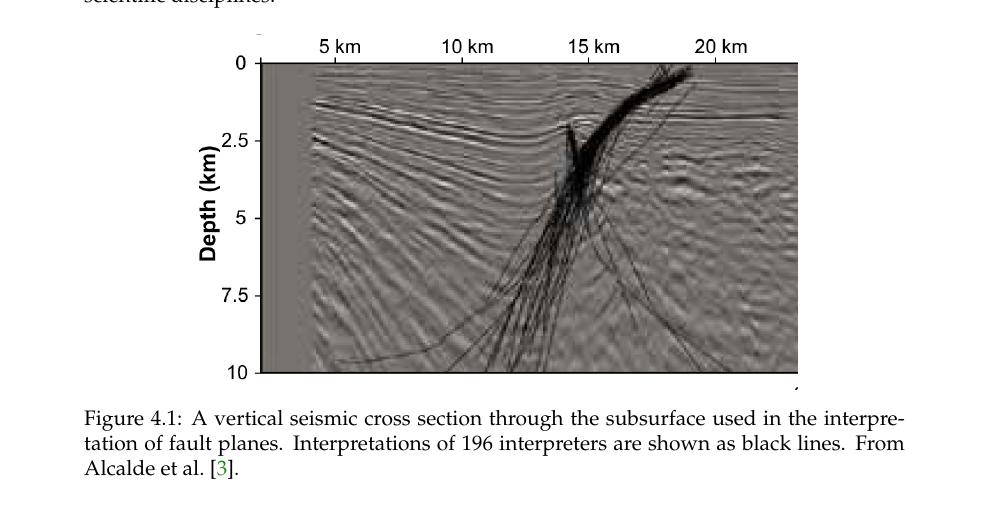

En el aprendizaje no supervisado.

* Clustering (agrupamiento)
* PCA (reduccion de dimensionalidad)
* Deteccion de Anomailias.


### Clustering (agrupamiento).
Se tienen colecciones de datos que se quieren agrupar en distintos grupos.
Como hacer este proceso automatico.


### K-means clustering.
Este algoritmo se basa en las metricas entre los datos.

Para explicarlo voy usar la grafica siguiente.

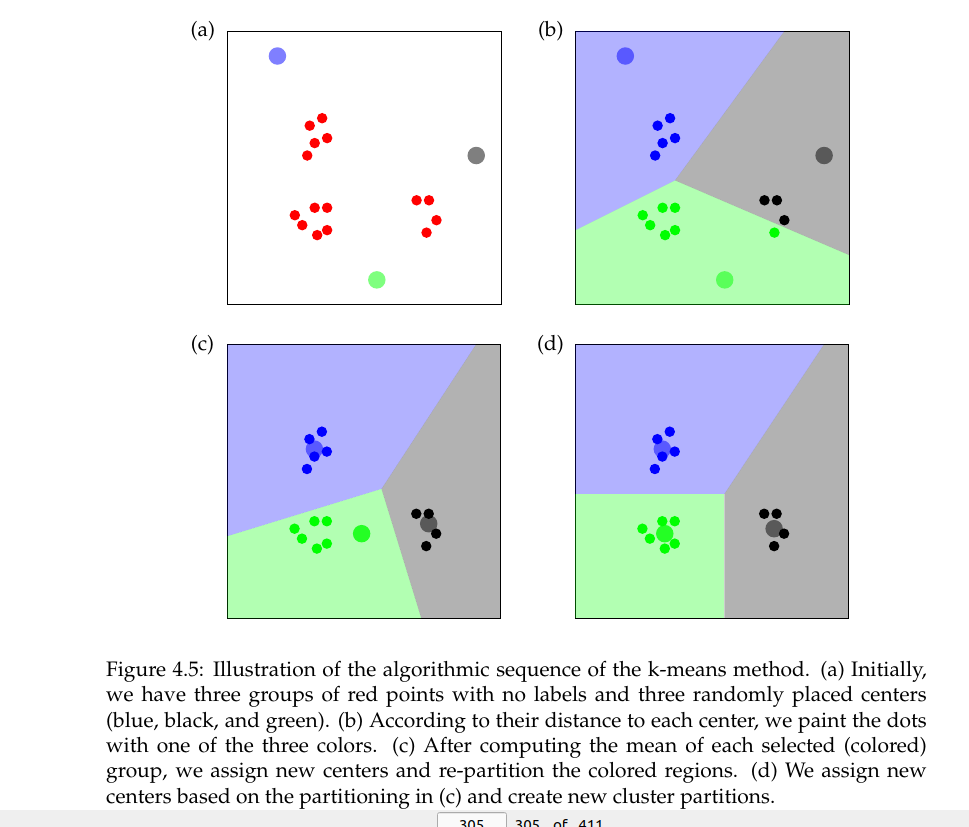

El algoritmo de K-means descrito arriba graficamente, en palabras queda:


* Se decide el number de grupos (clusters). 3 en el ejemplo.
* Se localizan $k$ ("centros") que no son centros la primera vez, por que son $k$ puntos aleatorios.
* Se inicializa un vector con $m$ componentes (recuerde que $m$ es el numero de puntos). Esde vector de enteros $c$ es tal que $c_i$ denota el indice del centro correspondiente. El centro correspondiente es el mas cercano a ese punto.
* A cada grupo $i$ con centro $i$ se le encuentra el centroide (suma sobre el numero de puntos, promedio). Ese centroide es el nuevo centro.
* Se recalcula el vector $c$, de forma que $c_i$ tiene un indice $i$ correspondiente al centro mas cercano.


Por ejemplo.  Diagmoms que tenemos 8 puntos, y que inicialmente los
puntos se van a agrupar en 3 grupos. De acuerdo a la cercania a los centros $1,2,3$ el vector $c_i=[1,1,2,3,1,3,2,2]$. Es decir, que el centro 1 esta mas cercano a los puntos $x_1, x_2, x_5$, el centro 2 a los puntos $x_3, x_7, x_8$, y el centro 3 esta mas cercano a $x_4, x_6$.

Ahora los nuevmos centroides son:

\begin{eqnarray}
\mu_1 &=& \frac{x_1 + x_2 + x_5}{3} \\
\mu_2 &=& \frac{x_3 + x_7 + x_8}{3} \\
\mu_3 &=& \frac{x_3 + x_6}{3} \\
\end{eqnarray}

Se repiten los ultimos dos pasos en ciclos. Cuando parar?

Todo en ML tiene funciones de costo. La funcion de costo que queremos minimiar es

$$ J(x, c, \mu) = \sum_{i=1}^m \| x_i - \mu_{c_i} \|^2 .$$

La siguiente grafica, que ustedes generaran en la siguiente tarea ilustra el k-means y el camino que siguen los centroides.

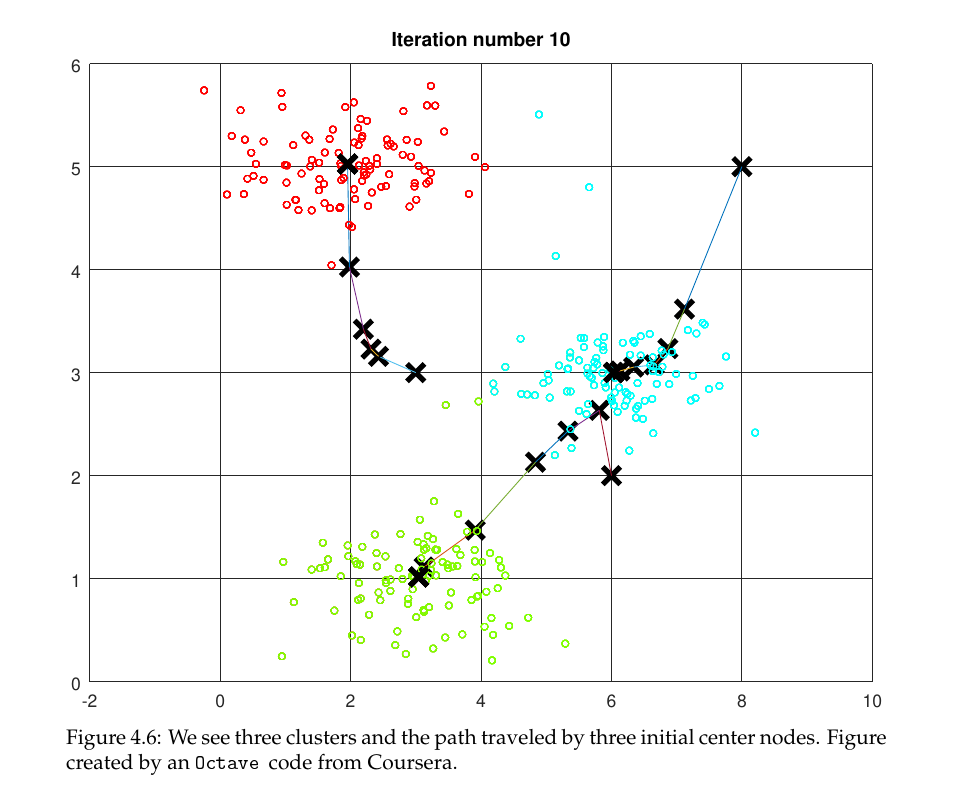

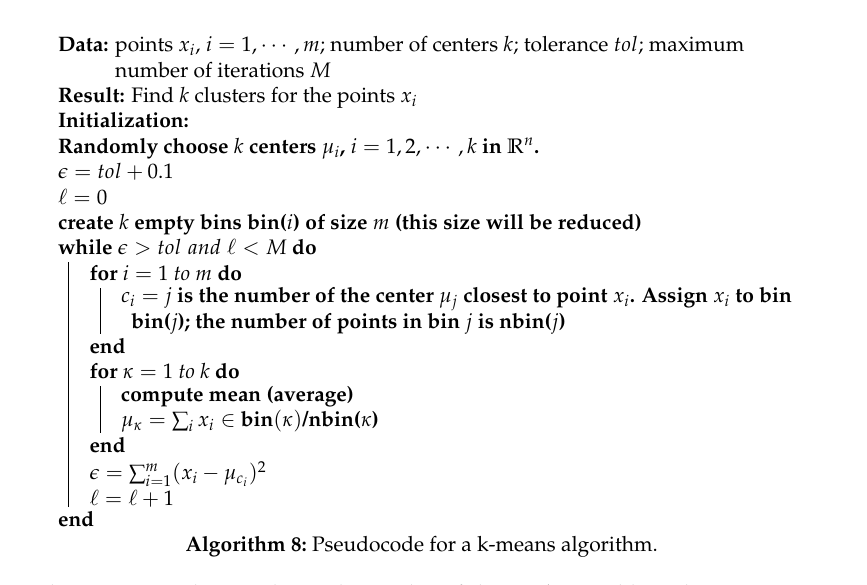

### Como sabemos cual es el $k$ optimo?


Para determinar el $k$ optimo los algoritmos deben hacer que

1. Los objetos de un mismo grupo sean tan cercanos como sea posible.
2. Los objetos de grupos distintos sean tan lejanos como sea posible.

Hay dos tipos de metodos para esto.

1. Los metodos directos. Por ejemplo el metodo del **codo** (elbow) y el metodo de la silueta (silhouette). Los describimos enseguida.

2. Metodos estadisticos, se basan en estadisticas. Lo tocamos someramente.


#### El metodo del **codo**.
La idea es construir una funcion de costo $J$ que sea funcion de $k$ donde $k$ es el numero de clusters (grupos). Entonces esta funcion debe descender. Y con seguridad desciende hasta 0 cuando $k=m$.
Veamos una grafica y la explicamos.

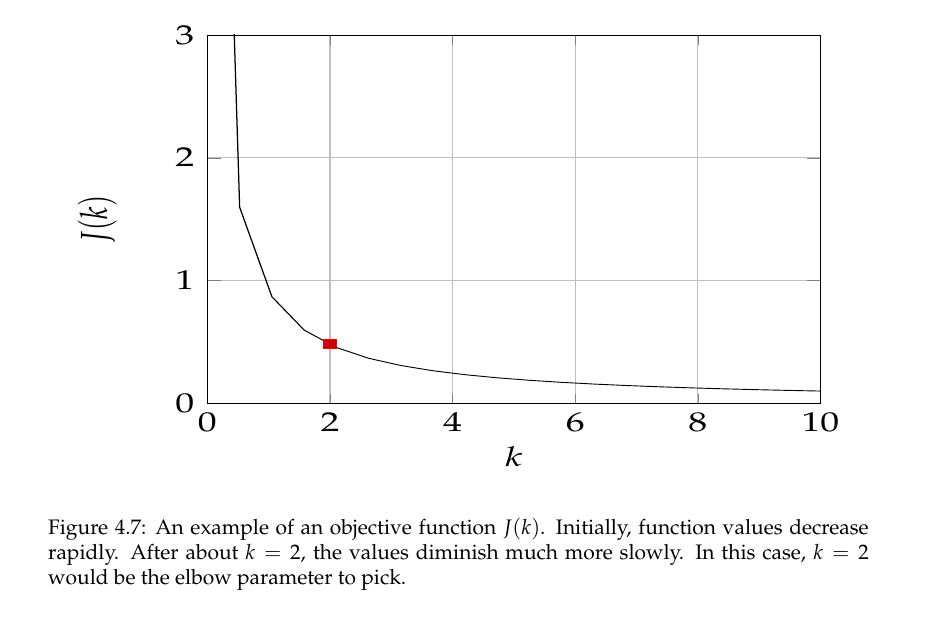

El punto rojo en la Figura 4.7 representa el **codo**. Es el punto donde la funcion se **aplana**. Ya no hay mucha ganancia haciendo un numero mayor de grupos. Cuando se aplana el costo beneficio se da. There are no return benefits.

Matematicamente como se determina donde esta el **codo**?
Puede ser calculando la curvatura y escogiendo el $k$ donde la curvatura sea maxima.


Este metodo no es muy usado en la practica.  Se usa mas el de la silueta que vemos enseguida.


#### Metodo de la silueta (silhouette)
La idea es identificar los objetos que estan dentro del mismo grupo (cohesion) y darles un peso con respecto a los objetos que estan lejos en otro grupo (separacion). La silueta esta en rango -1 a 1. Un valor alto (en promedio) es bueno, indica que los puntos estan bien anclados para ese $k$ espeficico. Cada punto tiene una silueta. Si un punto tiene una silueta de 0, entonces esta en limite (boundary line, linea de frontera) de dos grupos. Un valor cercano a uno para un punto $x_i$ significa que el puntos esta fuera del cluster observado. Esto es malo.


Vamos a matematica del asunto:

$$C_I= \{x_{I1}, x_{I2}, \cdots , x_{IK_I} \}  .$$
donde $K_I=|C_i|$. Los indicese mayusculos son para los clusters y los minusculos para los elementos dentro del cluster.

Definimos la **cohesion** $a_{iI}$a como la distancia media todos los puntos del cluster $I$.


$$ a_{iI} = \frac{1}{|C_i|-1} \sum_{j=1 }^{k_I} d(x_{Ij}, x_{Ii}).$$
la distancia $d(x_{Ij}, x_{Ii})$ puede ser la distancia Euclidiana, o cualquier otra metrica valida.




Que pasa si queremos medir la cohesion con respecto a otro cluster $J$,
el puntos $x_{Ii}$ esta por fuera por que $J \ne I$.


$$ \frac{1}{|C_J|} \sum_{j=1}^{k_J} d(x_{iI}, x_{jJ}) .$$
Este numero por obvias razones es mayor, y entre mas cohesion exista mas pequenho es $a_{iI}$.




La otra medida importante, para calcular la silueta, es la **separacion**.

Esta medida es:


$$b_{iI} = \min_{J \ne I} \frac{1}{k_J} \sum_{j=1}^{k_J} d(x_{iI}, x_{jJ}) .$$

Usamos la cohesion $a_{iI}$ junto la separacion $b_{iI}$ para definir la silueta. La silueta se define como.


\begin{eqnarray}
s_{iI} = \left \{
    \begin{array}{cc}
    \frac{b_{iI} - a_{iI}}{\max \{a_{iI}, b_{iI}\}} & \text{si } |C_I| > 1 \\
    0 & \text{si } | C_I | = 1
    \end{array}
    \right .
\end{eqnarray}

Desde el punto de vista matematico, podemos pensar en la silueta como una funcion.

\begin{eqnarray}
s : A &\to& [-1, 1] \\
x_{iI} &\mapsto& s_{iI}
\end{eqnarray}
donde $A = \cup_{i=1}^n C_I$ donde $n$ es el numero de grupos.

Por favor visitar
[Python silhouette analysis tools](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)


### The gap statistics method
Este metodo fue introducido por Tibshirani et al., 2001. este metodo
usa estadistica y no lo vamos a considerar en esta clase.


## Problemas que puede tener el k-means.
Se usa para cluster esfericos.
Introduzco una grafica y la discutimos.




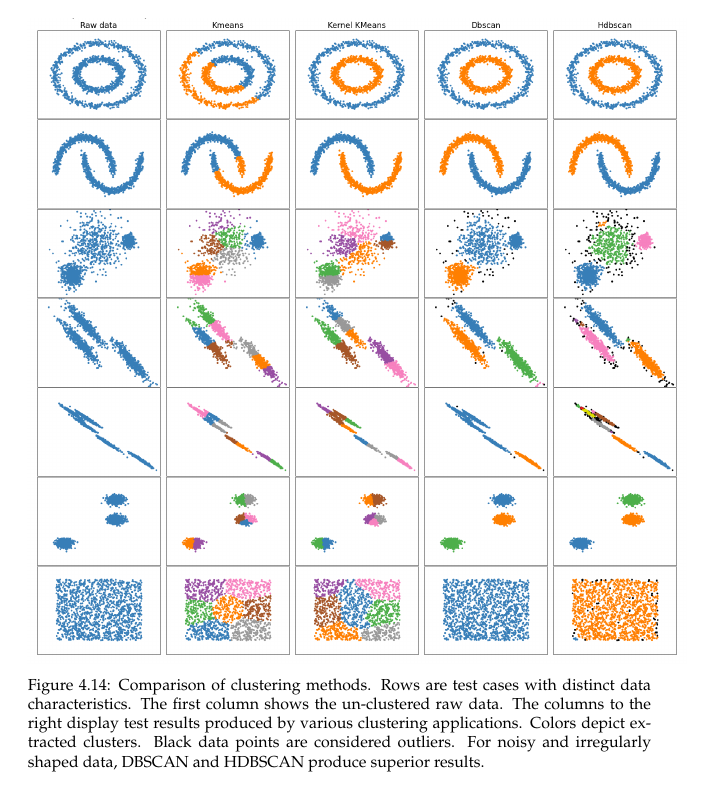

La discusion de la grafica 4.14 fue oral.

Hay otros metodo que no vemos en esta clase
* DBSCAN (Density Based Spacial Clustering of Applications). Basado en densidad.
* HDBSCAN(Hierarchical Density Based Spacial Clustering of Applications)
Basado en jerarquias.
* Usando teoria de grafos (no lo conozco, Gracias a John Wilmer).

# Proxima clase: Reduccion de dimensionalidad (PCA).